**Project:** Bike Sharing Demand Prediction using Random Forest Regressor

**Model:** Random Forest Regressor

**Dataset:** UCI Bike Sharing

**Author:** Tasnima Jannat

**Date:** October, 2025

**Project Overview:** This project predicts bike rental demand using the UCI Bike Sharing Dataset.
I implemented a Random Forest Regressor with basic Exploratory Data Analysis (EDA), data preprocessing, hyperparameter tuning, and model evaluation.

**Objective:** Predicting how many bikes will be rented on a given day based on weather, season, working day and other conditions.

**Target Variable:** cnt (total bike rentals)

**Features:** instant, time of the day, season, year, month, hour, holiday, weekday, working day, weather situation, temperature, humidity, windspeed.


**Dataset Information:**
Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.
This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.

**Dataset Characteristics:** Multivariate     **Subject Area:** Social Science

**Associated Tasks:** Regression     **Feature Type:** Integer, Real

In [100]:
# In this project, we are predicting how many bikes will be rented on a given day based on weather, season, working day and other conditions.

Import The Libraries

In [101]:
# These are the essential Python libraries for data handling, visualization, and machine learning.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries from scikit-learn

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib # For saving model
import warnings
warnings.filterwarnings('ignore') # It tells pythons not to show any warning meessages and just to run the code quietly. I did it to keep the codebook clean.

Load The dataset

In [102]:
# The dataset comes from the UCI Machine Learning Repository.
# We'll import it from the ucimlrepo using python code.

In [103]:
pip install ucimlrepo

In [104]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
df = fetch_ucirepo(id=275)

# data (as pandas dataframes)
# Define Features and Target
# Features = all independent variables
# Target = dependent variable

X = df.data.features
y = df.data.targets

# metadata
print(df.metadata)

# variable information
print(df.variables)


{'uci_id': 275, 'name': 'Bike Sharing', 'repository_url': 'https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/275/data.csv', 'abstract': 'This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 17389, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['cnt'], 'index_col': ['instant'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5W894', 'creators': ['Hadi Fanaee-T'], 'intro_paper': {'ID': 422, 'type': 'NATIVE', 'title': 'Event labeling combining ensemble detectors and background knowledge', 'authors': 'Hadi Fanaee-T, João Gama', 'venue': 'Progress

In [105]:
# Here, target variable is in dataframe format. We'll transform them into series to later use it into pd.qcut for making bins.
if isinstance(y,pd.DataFrame):
  y = y.squeeze()
  print("Data shapes: ")
  print("X: ", X.shape)
  print("y: ", y.shape)

Data shapes: 
X:  (17379, 13)
y:  (17379,)


In [106]:
# Combine X and y into one dataframe for easy EDA
df = pd.concat([X, y.rename('cnt')], axis=1)

print("Dataset loaded successfully!")
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())


Dataset loaded successfully!
Shape: (17379, 14)

Columns: ['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']


#Basic Exploratory Data Analysis (EDA)

In [108]:
# Now we'll do some basic Exploratory Data Analysis (EDA) to get an idea about the dataset

In [109]:
# General Info
print("\nDATA INFO:")
print(df.info())


DATA INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 1.9+ MB
None


Missing Value Check

In [110]:
print("\nMISSING VALUES:")
print(df.isnull().sum())


MISSING VALUES:
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


Basic Statistics

In [111]:
print("\nSUMMARY STATISTICS:")
print(df.describe().T)


SUMMARY STATISTICS:
              count        mean         std   min      25%       50%  \
season      17379.0    2.501640    1.106918  1.00   2.0000    3.0000   
yr          17379.0    0.502561    0.500008  0.00   0.0000    1.0000   
mnth        17379.0    6.537775    3.438776  1.00   4.0000    7.0000   
hr          17379.0   11.546752    6.914405  0.00   6.0000   12.0000   
holiday     17379.0    0.028770    0.167165  0.00   0.0000    0.0000   
weekday     17379.0    3.003683    2.005771  0.00   1.0000    3.0000   
workingday  17379.0    0.682721    0.465431  0.00   0.0000    1.0000   
weathersit  17379.0    1.425283    0.639357  1.00   1.0000    1.0000   
temp        17379.0    0.496987    0.192556  0.02   0.3400    0.5000   
atemp       17379.0    0.475775    0.171850  0.00   0.3333    0.4848   
hum         17379.0    0.627229    0.192930  0.00   0.4800    0.6300   
windspeed   17379.0    0.190098    0.122340  0.00   0.1045    0.1940   
cnt         17379.0  189.463088  181.387599

In [112]:
# Quick Look at First Few Rows
print("\nSAMPLE DATA:")
print(df.head())


SAMPLE DATA:
       dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1   0        0        6           0           1   
1  2011-01-01       1   0     1   1        0        6           0           1   
2  2011-01-01       1   0     1   2        0        6           0           1   
3  2011-01-01       1   0     1   3        0        6           0           1   
4  2011-01-01       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  cnt  
0  0.24  0.2879  0.81        0.0   16  
1  0.22  0.2727  0.80        0.0   40  
2  0.22  0.2727  0.80        0.0   32  
3  0.24  0.2879  0.75        0.0   13  
4  0.24  0.2879  0.75        0.0    1  


Target Variable distribution

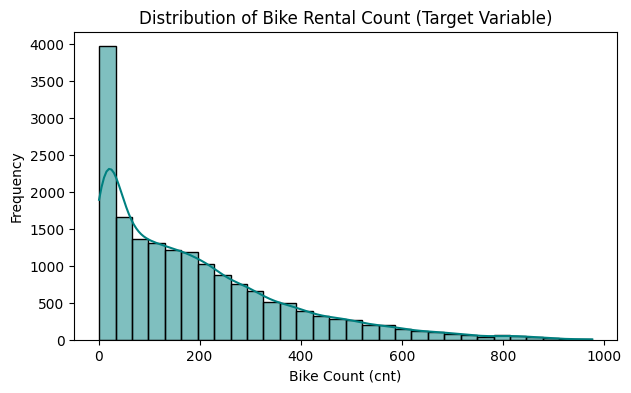

In [113]:
plt.figure(figsize=(7,4))
sns.histplot(df['cnt'], kde=True, bins=30, color='teal')
plt.title("Distribution of Bike Rental Count (Target Variable)")
plt.xlabel("Bike Count (cnt)")
plt.ylabel("Frequency")
plt.show()

**OBSERVATION:** Target variable is rightly skewed.


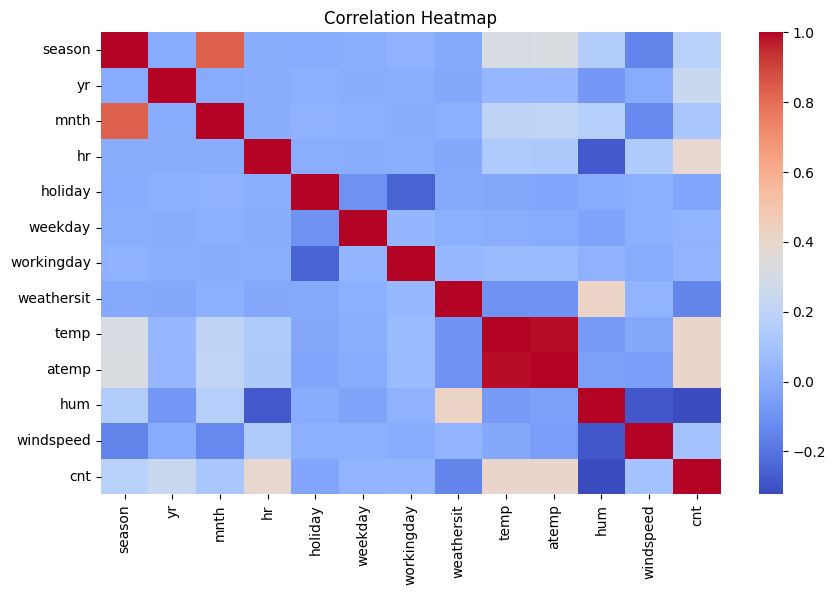

In [114]:
# Correlation Heatmap (Numerical Features)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

**OBSERVATION:** Apart from humidity and windspeed, all other features have positive correlation.


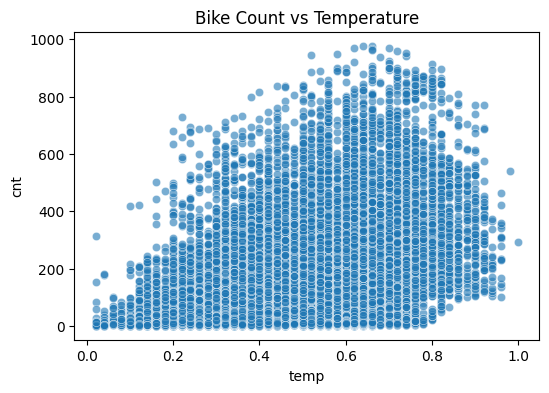

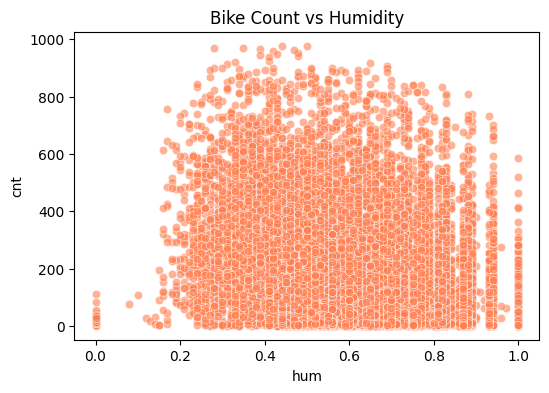

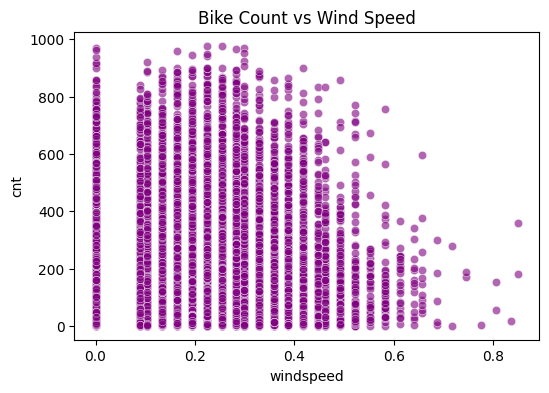

In [115]:
# Scatter Plots for Key Relationships
plt.figure(figsize=(6,4))
sns.scatterplot(x='temp', y='cnt', data=df, alpha=0.6)
plt.title("Bike Count vs Temperature")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='hum', y='cnt', data=df, alpha=0.6, color='coral')
plt.title("Bike Count vs Humidity")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='windspeed', y='cnt', data=df, alpha=0.6, color='purple')
plt.title("Bike Count vs Wind Speed")
plt.show()



**OBSERVATION**: Temperature has a strong positive correlation with target.
Humidity and windspeed have negativee correlations.


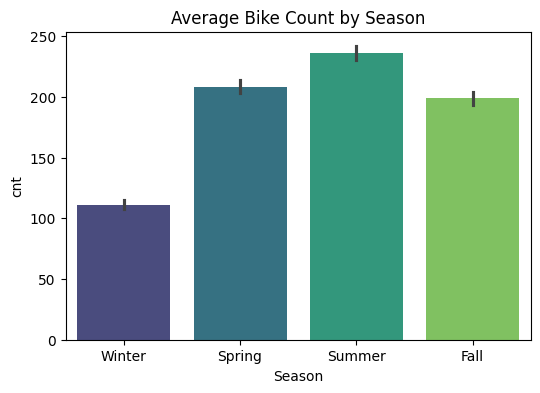

In [116]:
# Seasonal Trend Example (Average Count by Season)
plt.figure(figsize=(6,4))
sns.barplot(x='season', y='cnt', data=df, palette='viridis', estimator='mean')
plt.title("Average Bike Count by Season")
plt.xticks(ticks = [0,1,2,3], labels = ['Winter', 'Spring', 'Summer', 'Fall'])
plt.xlabel("Season")
plt.show()

**OBSERVATION**: Rentals increase in summer.


#Basic Data Cleaning and Feature Preparation

In [117]:
# Drop leakage or irrelevant columns
df = df.drop(columns=["instant", "dteday", "casual", "registered"], errors='ignore')

Define target and features

In [118]:
target = "cnt"
X = df.drop(columns=[target])
y = df[target]

Feature Engineering

In [119]:
categorical_cols = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]
categorical_cols = [col for col in categorical_cols if col in X.columns]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

print("Numeric features:", numeric_cols)
print("Categorical features:", categorical_cols)

Numeric features: ['hr', 'temp', 'atemp', 'hum', 'windspeed']
Categorical features: ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']


# Train-Valid-Test-Split

Here I am using Stratified-binning technique to train-valid-test-split. It handles small, large, skewed, or imbalanced datasets. It can plug into any regression pipeline directly. My target variable is skewed as we saw in EDA. That's why I used this technique here.

In regression problem, the target variable is continuous. So, we cannot directly use stratify = y like in classification. To handle this, I created quantile bins of the target variables. This ensures that all subsets- train, validation, and test maintain a similar range and distribution of target variables.

In [120]:
# Create stratified bins using quantiles (10 bins here)
n_bins = 10
y_bins = pd.qcut(y, q=n_bins, duplicates='drop')

# Step 1: Split into Train + Temp (Validation+Test)

X_train, X_temp, y_train, y_temp, yb_train, yb_temp = train_test_split(
    X, y, y_bins,
    test_size=0.30,              # 70% train, 30% temp
    stratify=y_bins,
    random_state=42)

# Step 2: Split Temp into Validation + Test
# We'll now split the temporary set into 50/50 for validation and test
# Each 15% of total dataset (since 30% * 0.5 = 15%)

y_temp_binned = pd.qcut(y_temp, q=n_bins, duplicates='drop')

X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    stratify=y_temp_binned,
    random_state=42)

In [121]:
# Print split summary
print(f"Train set: {X_train.shape[0]} samples ({X_train.shape[0]/len(df)*100:.2f}%)")
print(f"Validation set: {X_valid.shape[0]} samples ({X_valid.shape[0]/len(df)*100:.2f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(df)*100:.2f}%)")

Train set: 12165 samples (70.00%)
Validation set: 2607 samples (15.00%)
Test set: 2607 samples (15.00%)


In [122]:
# Check distribution similarity
print("\nDistribution check (Target mean per split):")
print(f"Train mean: {y_train.mean():.2f}")
print(f"Valid mean: {y_valid.mean():.2f}")
print(f"Test mean : {y_test.mean():.2f}")


Distribution check (Target mean per split):
Train mean: 189.75
Valid mean: 188.17
Test mean : 189.42


#Data preprocessing

The purpose of data preprocessing is to prepare raw data into a clean, structured, and machine-understandable format so that models can learn effectively and give reliable results. Though random forest regression doesnot need scaling, I kept it as a good practice. There is also no missing values in the dataset but I kept imputer as a good practice to use it into any other dataset.

For **Numeric features**, I used *Imputer (median)* to fill missing values and used *StandardScaler* to standardize numeric features to have mean 0 and standard deviation 1, keeping on same scale for better model performance.

For **Categorical features**, I used *Imputer ( most frequent)* to preserve the data integrity and used *One Hot Encoder* to convert categorical variables into machine-readable numbers.

In [123]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns

num_pipe = Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])

cat_pipe = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')), ('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer([('num', num_pipe, num_cols), ('cat', cat_pipe, cat_cols)])


#Model Pipeline

In [124]:
# Set a random seed for reproducibility

rf = RandomForestRegressor(random_state=42)

model = Pipeline([('preprocessor', preprocessor), ('rf', rf)])

#Hyperparameter Tuning
Hyperparameter are set before training a model to make the model perform better.
Hyperparameter tuning helps to optimize model complexity to avoid underfitting or overfitting. Here, I used *RandomizedSearchCV* to tune hyperparameter. It will randomly test different hyperparameter combinations on train and validation sets to find the best configuration. The test set is kept completely separate for final evaluation to avoid biased results.


In [125]:
# HYPERPARAMETER TUNING (RandomizedSearchCV)

param_grid = {'rf__n_estimators': [100, 200],    # number of decision trees to be built
    'rf__max_depth': [10, 20, None],             # number of splits in each decision tree
    'rf__min_samples_split': [2, 5],             # minimum number of samples to split an internal decision node
    'rf__min_samples_leaf': [1, 2],              # minimum number of samples in a leaf
    'rf__max_features': ['sqrt', 0.5]}           # number of features to consider when looking for the best split

# Perform random search with 3-fold cross-validation
search = RandomizedSearchCV(
    model,
    param_distributions=param_grid,
    n_iter=5,              # Number of random combinations. Keep small for speed
    scoring='r2',
    cv=3,                   # Cross validation folds
    random_state=42,
    n_jobs=-1,
    verbose = 1)

# Train the model
print("\nTraining and tuning model...")
search.fit(X_train, y_train)
best_model = search.best_estimator_
print("Best parameters:", search.best_params_)


Training and tuning model...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters: {'rf__n_estimators': 100, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 1, 'rf__max_features': 0.5, 'rf__max_depth': None}


#Model Evaluation (Validation Set)

MAE: average absolute prediction error

RMSE: penalizes large errors

R²: how much variance in target is explained by model

Cross_val_score: how well a machine learning model generalizes to unseen data

In cross validation, instead of training and testing once, the data is split into multiple folds and the model is trained and evaluated multiple times on different subsets.

In [126]:
# Make predictions on validation set
y_valid_pred = best_model.predict(X_valid)

# Calculate performance metrics
rf_r2_valid = r2_score(y_valid, y_valid_pred)
rf_mse_valid = mean_squared_error(y_valid, y_valid_pred)
rf_rmse_valid = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
rf_mae_valid = mean_absolute_error(y_valid, y_valid_pred)

print("\nRandom Forest Results (Validation set):")
print(f"R²:   {rf_r2_valid:.3f}")
print(f"MSE  (Mean Squared Error): {rf_mse_valid:.4f}")
print(f"RMSE: {rf_rmse_valid:.3f}")
print(f"MAE:  {rf_mae_valid:.3f}")


Random Forest Results (Validation set):
R²:   0.942
MSE  (Mean Squared Error): 1857.2719
RMSE: 43.096
MAE:  27.125


Residual Analysis on validation set

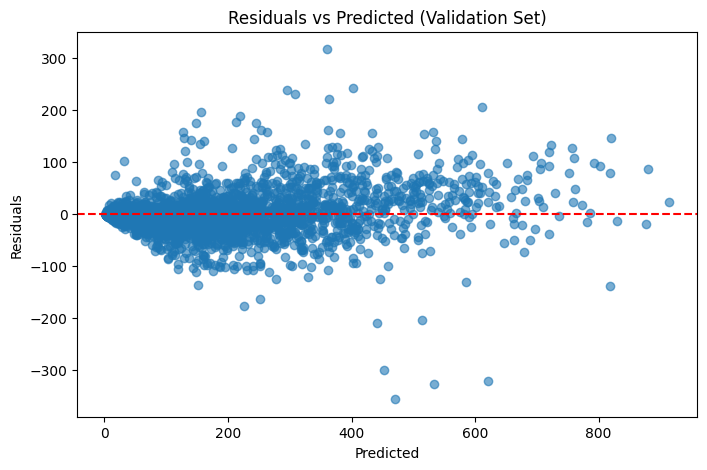

In [127]:
# Residual Plot (Validation Set)
residuals = y_valid - y_valid_pred
plt.figure(figsize=(8,5))
plt.scatter(y_valid_pred, residuals, alpha=0.6)
plt.axhline(0, color="r", linestyle="--")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Validation Set)")
plt.show()

In [128]:
# Cross-validation on Training Data
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring="r2", n_jobs=-1)
cv_r2 = cv_scores
print("\nCross-validation R squared Scores:", np.round(cv_r2, 3))
print("Mean CV R2:", np.mean(cv_r2).round(3))



Cross-validation R squared Scores: [0.939 0.93  0.928 0.937 0.939]
Mean CV R2: 0.934


In [129]:
# Final Evaluation on Test Set
y_test_pred = best_model.predict(X_test)

rf_r2_test = r2_score(y_test, y_test_pred)
rf_mse_test = mean_squared_error(y_test, y_test_pred)
rf_rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
rf_mae_test = mean_absolute_error(y_test, y_test_pred)

print("\nRandom Forest Results (Test set):")
print(f"R²:   {rf_r2_test:.3f}")
print(f"MSE  (Mean Squared Error): {rf_mse_test:.4f}")
print(f"RMSE: {rf_rmse_test:.3f}")
print(f"MAE:  {rf_mae_test:.3f}")


Random Forest Results (Test set):
R²:   0.939
MSE  (Mean Squared Error): 1985.8605
RMSE: 44.563
MAE:  28.402


**Interpretation:**

R2 : The model explains 93.9% of the variance in bike rental demand.

RMSE: The typical prediction error is approximately 44 bikes, with larger errors being more heavily penalized.

MAE: On average, the model's predictions are off by about 28 bikes from the actual rental count.  

**Residual Analysis on test set**

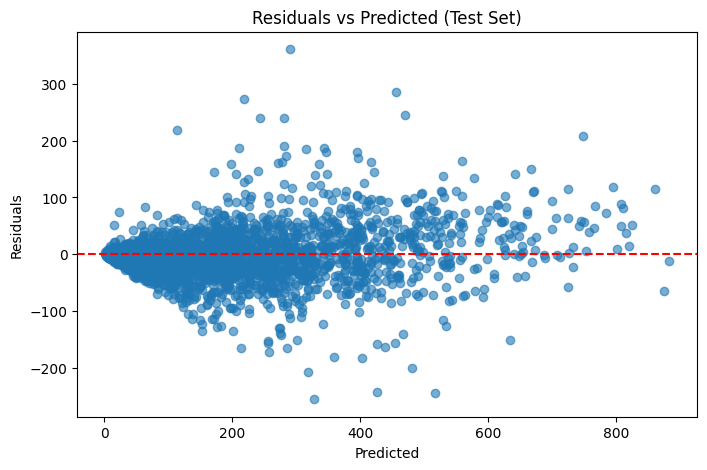

In [130]:
# Residual Plot (Test Set)
residuals_test = y_test - y_test_pred
plt.figure(figsize=(8,5))
plt.scatter(y_test_pred, residuals_test, alpha=0.6)
plt.axhline(0, color="r", linestyle="--")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Test Set)")
plt.show()


**Observation:** The plot depicts my random forest regressor model is doing well overall. Predictions are centered properly and residuals are random for most of the range. However, it is less accurate at the high demand end where predicted values are large. This means that for very busy days, the model tends to underestimate the number of rentals.

The fan shape indicates that error variance increases with predicted value, a sign of heteroscedasticity. It is common in real world regression cases.
To mitigate this further, we can try transforming the target to log to reduce skewness and also can try adding interactive features such as temperature  with season etc.

**Persistence Model:** It is simply a reference model used to compare performance of more complex algorithms.
Here, I used this baseline model using mean of the target. If the train model cannot outperform the baseline model, it means that the model is not learning useful patterns yet.

In [131]:
# PERSISTENCE (BASELINE) MODEL (mean predictor)

base = DummyRegressor(strategy='mean')
base.fit(X_train, y_train)
y_base = base.predict(X_test)
base_r2 = r2_score(y_test, y_base)

print("\nBaseline R²:", base_r2)


Baseline R²: -3.2847506725719455e-06


**Observation:** The R-squared value of my trained model is far better than this baseline model. So, my regressor model could outperform the persistence model.

In [132]:
# SAVE MODEL

joblib.dump(best_model, "random_forest_regression_model.pkl")
print("\nModel saved as random_forest_regression_model.pkl")

# Saving model allows us to load it later for predictions on new data without retraining.


Model saved as random_forest_regression_model.pkl


#Feature Importance
It shows how much input variable contributes to the model's prediction. In random forest regressor model, feature importance measures how much each feature helps the model reduce prediction error across all decision trees.


Top 10 Important Features:
            Feature  Importance
3           num__hr    0.527264
9        num__atemp    0.097472
8         num__temp    0.080681
1           num__yr    0.075565
10         num__hum    0.051593
6   num__workingday    0.051204
5      num__weekday    0.031914
0       num__season    0.023036
2         num__mnth    0.021682
11   num__windspeed    0.019191


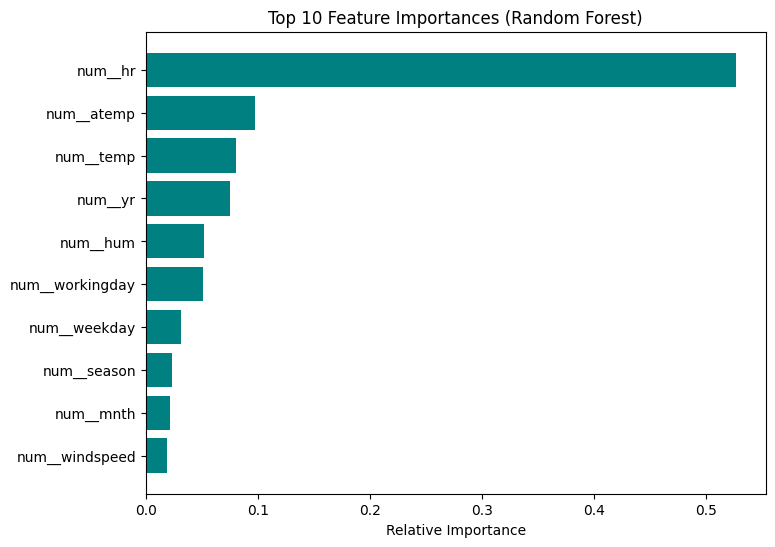

In [133]:
# FEATURE IMPORTANCE (after the model training)

# Extract the trained Random Forest model from the pipeline.
rf_model = best_model.named_steps['rf']

# Get feature names after preprocessing
# ColumnTransformer expands categorical variables, so we need this.
preprocessor = best_model.named_steps['preprocessor']
feature_names = preprocessor.get_feature_names_out()

# Get importance scores
importances = rf_model.feature_importances_

# Combine into a DataFrame for easy viewing
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Important Features:")
print(feat_imp.head(10))

# Plot feature importance
plt.figure(figsize=(8,6))
plt.barh(feat_imp['Feature'][:10], feat_imp['Importance'][:10], color='teal')
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Relative Importance")
plt.show()

# Feature importance helps explain which variables contribute most to the model's predictions that adds interpretability.

**Observation:** We can see that hour of the day has higher feature importance, which means it plays a larger role in predicting the target.

In [134]:
print("\n Random Forest Regression project completed successfully!")


 Random Forest Regression project completed successfully!


**Key Insights**

*   The Random Forest Regressor achieved a strong R² score, showing its capability to generalize well.


*   Residual analysis validated that model errors were stable and unbiased.


*   Stratified splitting ensured consistent target representation, reducing data leakage and performance bias.


**Conclusion**

This project demonstrates a complete machine learning workflow — from preprocessing and stratified sampling to hyperparameter optimization and rigorous evaluation.
The model stands as a robust and interpretable predictive system, suitable for real-world deployment and future model stacking or ensemble approaches.